<a href="https://colab.research.google.com/github/ashivashankars/CMPE255_Assignments/blob/main/tutorials/Tutorial%20-%20Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Last updated: 16 Feb 2023

# 👋 PyCaret Multiclass Classification Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [ ]:
# STEP 1 — confirm your Python version (should be 3.12)
import sys
print(sys.version)

# STEP 2 — upgrade pip and dependencies
!pip install -U pip setuptools wheel scikit-learn>=1.4

# STEP 3 — install PyCaret directly from GitHub (latest main/master branch supports 3.12)
!pip install -U git+https://github.com/pycaret/pycaret.git@master

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.31.0 requires pandas<2.3.0,>=1.1, but you have pandas 2.3.3 which is incompatible.
sktime 0.31.0 requires scikit-learn<1.6.0,>=0.24, but you have scikit-learn 1.7.2 which is incompatible.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.2 which is incompatible.
pycaret 3.4.0 requires matplotlib<3.8.0, but you have matplotlib 3.10.7 which is incompatible.
pycaret 3.4.0 requires pandas<2.2, but you have pandas 2.3.3 which is incompatible.
pycaret 3.4.0 requires scikit-learn<1.5, but you have scikit-learn 1.7.2 which is incompatible.
pycaret 3.4.0 requires scipy<=1.11.4,>=1.6.1, but you have scipy 1.16.3 which is incompatible.
  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build

In [ ]:
!pip install -U numpy==1.26.4 optuna scipy pandas matplotlib seaborn lightgbm xgboost catboost

  Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.3.3-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached matplotlib-3.10.7-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
Using cached scipy-1.16.3-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.7 MB)
Using cached pandas-2.3.3-cp312-cp312-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (12.4 MB)
Using cached matplotlib-3.10.7-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    

In [ ]:
# check installed version
import pycaret
import numpy as np
print(np.__version__)
print(pycaret.__version__)

1.26.4
3.4.0


In [ ]:
from pycaret.datasets import get_data
get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


# 🚀 Quick start

PyCaret’s Classification Module is a supervised machine learning module that is used for classifying elements into groups. The goal is to predict the categorical class labels which are discrete and unordered.

Some common use cases include predicting customer default (Yes or No), predicting customer churn (customer will leave or stay), the disease found (positive or negative).

This module can be used for binary or multiclass problems. It provides several pre-processing features that prepare the data for modeling through the setup function. It has over 18 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret consist of following 5 steps in this order:

## **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [ ]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('glass')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'Type', session_id = 123, use_gpu = True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(214, 10)"
5,Transformed data shape,"(214, 10)"
6,Transformed train set shape,"(149, 10)"
7,Transformed test set shape,"(65, 10)"
8,Numeric features,9
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Label Encoding:**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [ ]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
# init setup on exp
exp.setup(data, target = 'Type', session_id = 123, use_gpu= True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(214, 10)"
5,Transformed data shape,"(214, 10)"
6,Transformed train set shape,"(149, 10)"
7,Transformed test set shape,"(65, 10)"
8,Numeric features,9
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.

## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7724,0.5680,0.7724,0.7326,0.7402,0.6833,0.6969,0.2010
catboost,CatBoost Classifier,0.7524,0.5708,0.7524,0.7259,0.7181,0.6515,0.6709,6.9620
rf,Random Forest Classifier,0.7457,0.5384,0.7457,0.7026,0.7061,0.6413,0.6597,0.4630
lightgbm,Light Gradient Boosting Machine,0.7186,0.5583,0.7186,0.6913,0.6851,0.6023,0.6238,0.7800
gbc,Gradient Boosting Classifier,0.7052,0.0000,0.7052,0.6724,0.6743,0.5886,0.6023,0.7430
xgboost,Extreme Gradient Boosting,0.7043,0.5407,0.7043,0.6798,0.6743,0.5892,0.6067,0.4400
dt,Decision Tree Classifier,0.6790,0.4562,0.6790,0.6544,0.6525,0.5593,0.5708,0.0280
knn,K Neighbors Classifier,0.5986,0.4919,0.5986,0.5466,0.5541,0.4278,0.4446,0.0450
lda,Linear Discriminant Analysis,0.5843,0.0000,0.5843,0.5414,0.5370,0.4072,0.4289,0.0250
lr,Logistic Regression,0.5710,0.0000,0.5710,0.5415,0.5262,0.3940,0.4242,0.2970


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

[2025-10-28 22:28:10.189] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization


In [ ]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7724,0.5680,0.7724,0.7326,0.7402,0.6833,0.6969,0.1970
catboost,CatBoost Classifier,0.7524,0.5708,0.7524,0.7259,0.7181,0.6515,0.6709,6.8870
rf,Random Forest Classifier,0.7457,0.5384,0.7457,0.7026,0.7061,0.6413,0.6597,0.4050
lightgbm,Light Gradient Boosting Machine,0.7186,0.5576,0.7186,0.6913,0.6851,0.6023,0.6238,0.4040
gbc,Gradient Boosting Classifier,0.7052,0.0000,0.7052,0.6724,0.6743,0.5886,0.6023,0.7260
xgboost,Extreme Gradient Boosting,0.7043,0.5407,0.7043,0.6798,0.6743,0.5892,0.6067,0.3320
dt,Decision Tree Classifier,0.6790,0.4562,0.6790,0.6544,0.6525,0.5593,0.5708,0.0260
knn,K Neighbors Classifier,0.5986,0.4919,0.5986,0.5466,0.5541,0.4278,0.4446,0.0370
lda,Linear Discriminant Analysis,0.5843,0.0000,0.5843,0.5414,0.5370,0.4072,0.4289,0.0370
lr,Logistic Regression,0.5710,0.0000,0.5710,0.5415,0.5262,0.3940,0.4242,0.2740


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

[2025-10-28 22:30:08.445] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

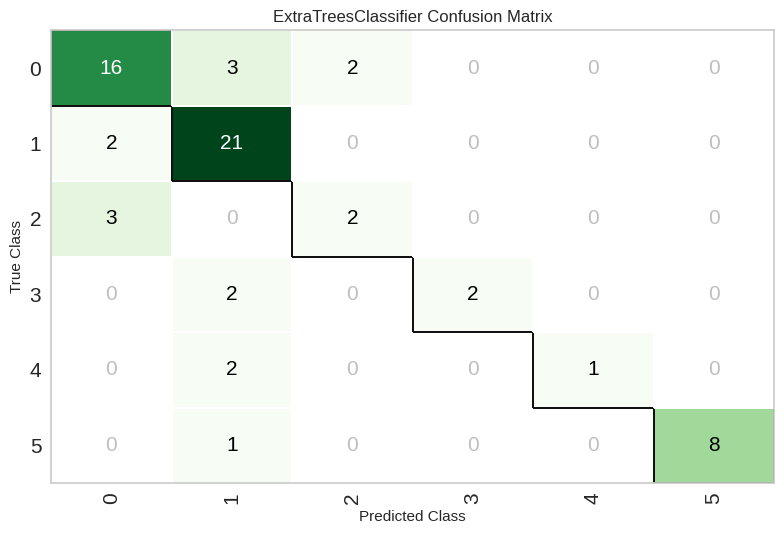

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

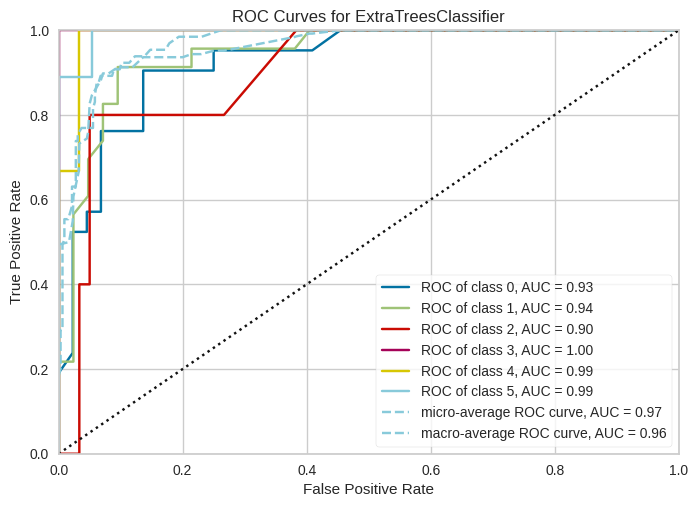

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

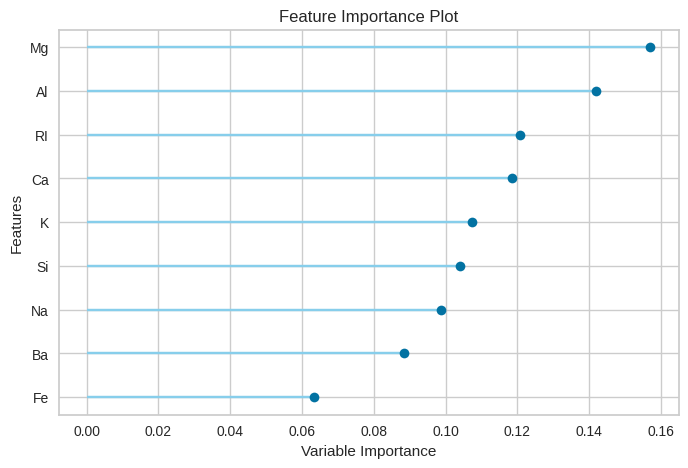

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.

    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')


    estimator: scikit-learn compatible object
        Trained model object


    plot: str, default = 'auc'
        List of available plots (ID - Name):

        * 'pipeline' - Schematic drawing of 

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7692,0.9468,0.7692,0.7870,0.7606,0.6765,0.6824


In [ ]:
# show predictions df
holdout_pred.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,prediction_label,prediction_score
175,1.52119,12.97,0.33,1.51,73.389999,0.13,11.27,0.0,0.28,5,2,0.54
108,1.52222,14.43,0.00,1.00,72.669998,0.10,11.52,0.0,0.08,2,2,0.59
84,1.51409,14.25,3.09,2.08,72.279999,1.10,7.08,0.0,0.00,2,2,0.49
3,1.51766,13.21,3.69,1.29,72.610001,0.57,8.22,0.0,0.00,1,1,0.50
182,1.51916,14.15,0.00,2.09,72.739998,0.00,10.88,0.0,0.00,6,2,0.32


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [ ]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('Type', axis=1, inplace=True)
new_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,prediction_label,prediction_score
0,1.52101,13.64,4.49,1.10,71.779999,0.06,8.75,0.0,0.0,1,1.00
1,1.51761,13.89,3.60,1.36,72.730003,0.48,7.83,0.0,0.0,1,1.00
2,1.51618,13.53,3.55,1.54,72.989998,0.39,7.78,0.0,0.0,2,0.85
3,1.51766,13.21,3.69,1.29,72.610001,0.57,8.22,0.0,0.0,1,0.50
4,1.51742,13.27,3.62,1.24,73.080002,0.55,8.07,0.0,0.0,1,0.81


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['RI', 'Na', 'Mg', 'Al', 'Si', 'K',
                                              'Ca', 'Ba', 'Fe'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=Fal...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['RI', 'Na', 'Mg', 'Al', 'Si', 'K',
                                             'Ca', 'Ba', 'Fe'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_f...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=123, verbose=0,
                                      warm_start=False))],
         verbose=False)

# 👇 Detailed function-by-function overview

## ✅ Setup
This function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [ ]:
s = setup(data, target = 'Type', session_id = 123, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(214, 10)"
5,Transformed data shape,"(214, 10)"
6,Transformed train set shape,"(149, 10)"
7,Transformed test set shape,"(65, 10)"
8,Numeric features,9
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [ ]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
# lets access X_train_transformed
get_config('X_train_transformed')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
103,1.52725,13.80,3.15,0.66,70.570000,0.08,11.64,0.00,0.00
171,1.51316,13.02,0.00,3.04,70.480003,6.21,6.96,0.00,0.00
187,1.52315,13.44,3.34,1.23,72.379997,0.60,8.83,0.00,0.00
109,1.51818,13.72,0.00,0.56,74.449997,0.00,10.99,0.00,0.00
87,1.51645,13.40,3.49,1.52,72.650002,0.67,8.08,0.00,0.10
...,...,...,...,...,...,...,...,...,...
34,1.51783,12.69,3.54,1.34,72.949997,0.57,8.75,0.00,0.00
53,1.51837,13.14,2.84,1.28,72.849998,0.55,9.07,0.00,0.00
15,1.51761,12.81,3.54,1.23,73.239998,0.58,8.39,0.00,0.00
207,1.51831,14.39,0.00,1.82,72.860001,1.41,6.47,2.88,0.00


In [ ]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [ ]:
# help(setup)

In [ ]:
# init setup with normalize = True

s = setup(data, target = 'Type', session_id = 123,use_gpu=True,
          normalize = True, normalize_method = 'minmax')

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 5: 3, 6: 4, 7: 5"
4,Original data shape,"(214, 10)"
5,Transformed data shape,"(214, 10)"
6,Transformed train set shape,"(149, 10)"
7,Transformed test set shape,"(65, 10)"
8,Numeric features,9
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

<Axes: >

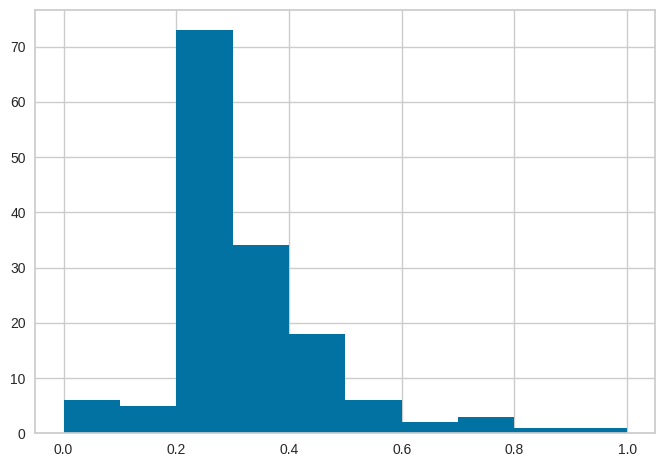

In [ ]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['RI'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<Axes: >

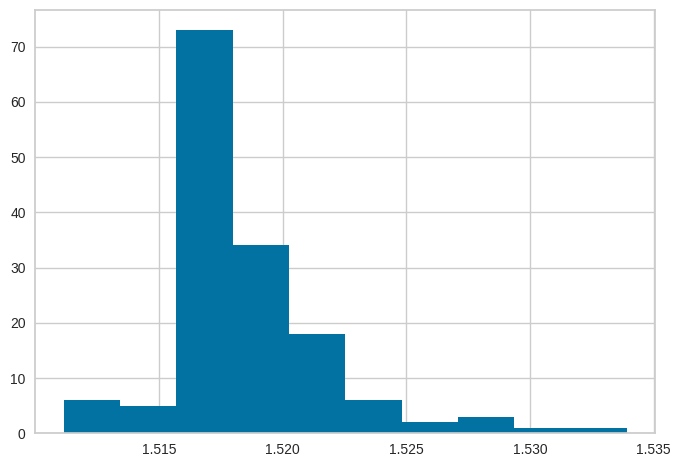

In [ ]:
get_config('X_train')['RI'].hist()

## ✅ Compare Models
This function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7724,0.5680,0.7724,0.7326,0.7402,0.6833,0.6969,0.2360
catboost,CatBoost Classifier,0.7524,0.5688,0.7524,0.7259,0.7181,0.6515,0.6709,7.0050
rf,Random Forest Classifier,0.7457,0.5384,0.7457,0.7026,0.7061,0.6413,0.6597,0.4010
lightgbm,Light Gradient Boosting Machine,0.7386,0.5591,0.7386,0.6894,0.7006,0.6287,0.6460,0.4100
gbc,Gradient Boosting Classifier,0.7052,0.0000,0.7052,0.6724,0.6743,0.5886,0.6023,0.6900
xgboost,Extreme Gradient Boosting,0.7043,0.5407,0.7043,0.6798,0.6743,0.5892,0.6067,0.3410
dt,Decision Tree Classifier,0.6790,0.4562,0.6790,0.6544,0.6525,0.5593,0.5708,0.0310
knn,K Neighbors Classifier,0.6319,0.4938,0.6319,0.5968,0.5968,0.4798,0.4966,0.0490
lda,Linear Discriminant Analysis,0.5843,0.0000,0.5843,0.5414,0.5370,0.4072,0.4289,0.0400
lr,Logistic Regression,0.5171,0.0000,0.5171,0.4616,0.4579,0.3034,0.3313,0.0530


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

[2025-10-28 22:34:25.327] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization


`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [ ]:
# check available models
models()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,cuml.linear_model.logistic_regression.Logistic...,True
knn,K Neighbors Classifier,cuml.neighbors.kneighbors_classifier.KNeighbor...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,cuml.linear_model.mbsgd_classifier.MBSGDClassi...,True
rbfsvm,SVM - Radial Kernel,cuml.svm.svc.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,cuml.linear_model.ridge.Ridge,True


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [ ]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7724,0.5680,0.7724,0.7326,0.7402,0.6833,0.6969,0.2100
catboost,CatBoost Classifier,0.7524,0.5688,0.7524,0.7259,0.7181,0.6515,0.6709,6.7270
rf,Random Forest Classifier,0.7457,0.5384,0.7457,0.7026,0.7061,0.6413,0.6597,0.3830
lightgbm,Light Gradient Boosting Machine,0.7386,0.5591,0.7386,0.6894,0.7006,0.6287,0.6460,0.5510
gbc,Gradient Boosting Classifier,0.7052,0.0000,0.7052,0.6724,0.6743,0.5886,0.6023,0.7760
xgboost,Extreme Gradient Boosting,0.7043,0.5407,0.7043,0.6798,0.6743,0.5892,0.6067,0.3370
dt,Decision Tree Classifier,0.6790,0.4562,0.6790,0.6544,0.6525,0.5593,0.5708,0.0320


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [ ]:
compare_tree_models

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7724,0.5680,0.7724,0.7326,0.7402,0.6833,0.6969,0.210
catboost,CatBoost Classifier,0.7524,0.5688,0.7524,0.7259,0.7181,0.6515,0.6709,6.727
rf,Random Forest Classifier,0.7457,0.5384,0.7457,0.7026,0.7061,0.6413,0.6597,0.383
lightgbm,Light Gradient Boosting Machine,0.7386,0.5591,0.7386,0.6894,0.7006,0.6287,0.6460,0.551
gbc,Gradient Boosting Classifier,0.7052,0.0000,0.7052,0.6724,0.6743,0.5886,0.6023,0.776
xgboost,Extreme Gradient Boosting,0.7043,0.5407,0.7043,0.6798,0.6743,0.5892,0.6067,0.337
dt,Decision Tree Classifier,0.6790,0.4562,0.6790,0.6544,0.6525,0.5593,0.5708,0.032


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `Recall`.

In [ ]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7724,0.5680,0.7724,0.7326,0.7402,0.6833,0.6969,0.1980
catboost,CatBoost Classifier,0.7524,0.5688,0.7524,0.7259,0.7181,0.6515,0.6709,6.7570
rf,Random Forest Classifier,0.7457,0.5384,0.7457,0.7026,0.7061,0.6413,0.6597,0.3720
lightgbm,Light Gradient Boosting Machine,0.7386,0.5587,0.7386,0.6894,0.7006,0.6287,0.6460,0.4260
gbc,Gradient Boosting Classifier,0.7052,0.0000,0.7052,0.6724,0.6743,0.5886,0.6023,0.7720
xgboost,Extreme Gradient Boosting,0.7043,0.5407,0.7043,0.6798,0.6743,0.5892,0.6067,0.3840
dt,Decision Tree Classifier,0.6790,0.4562,0.6790,0.6544,0.6525,0.5593,0.5708,0.0330
knn,K Neighbors Classifier,0.6319,0.4938,0.6319,0.5968,0.5968,0.4798,0.4966,0.0380
lda,Linear Discriminant Analysis,0.5843,0.0000,0.5843,0.5414,0.5370,0.4072,0.4289,0.0280
lr,Logistic Regression,0.5171,0.0000,0.5171,0.4616,0.4579,0.3034,0.3313,0.0550


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

[2025-10-28 22:38:44.776] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization


In [ ]:
# list of top 3 models by Recall
best_recall_models_top3

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False),
 RandomForestClassifier()]

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [ ]:
# help(compare_models)

## ✅ Create Model
This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the models function.

In [ ]:
# check all the available models
models()

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split req

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,cuml.linear_model.logistic_regression.Logistic...,True
knn,K Neighbors Classifier,cuml.neighbors.kneighbors_classifier.KNeighbor...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,cuml.linear_model.mbsgd_classifier.MBSGDClassi...,True
rbfsvm,SVM - Radial Kernel,cuml.svm.svc.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,cuml.linear_model.ridge.Ridge,True


In [ ]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.0000,0.6000,0.6000,0.5785,0.4231,0.4438
1,0.4667,0.0000,0.4667,0.4400,0.4013,0.2453,0.2930
2,0.4667,0.0000,0.4667,0.3704,0.3860,0.2308,0.2568
3,0.6000,0.0000,0.6000,0.6556,0.5067,0.4479,0.5275
4,0.6000,0.0000,0.6000,0.5071,0.5333,0.4444,0.4629
5,0.5333,0.0000,0.5333,0.4000,0.4444,0.3000,0.3472
6,0.4000,0.0000,0.4000,0.3250,0.3538,0.1346,0.1410
7,0.4000,0.0000,0.4000,0.3694,0.3639,0.1176,0.1247
8,0.5333,0.0000,0.5333,0.4583,0.4872,0.3269,0.3425


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.0,0.6000,0.6000,0.5785,0.4231,0.4438
1,0.4667,0.0,0.4667,0.4400,0.4013,0.2453,0.2930
2,0.4667,0.0,0.4667,0.3704,0.3860,0.2308,0.2568
3,0.6000,0.0,0.6000,0.6556,0.5067,0.4479,0.5275
4,0.6000,0.0,0.6000,0.5071,0.5333,0.4444,0.4629
5,0.5333,0.0,0.5333,0.4000,0.4444,0.3000,0.3472
6,0.4000,0.0,0.4000,0.3250,0.3538,0.1346,0.1410
7,0.4000,0.0,0.4000,0.3694,0.3639,0.1176,0.1247
8,0.5333,0.0,0.5333,0.4583,0.4872,0.3269,0.3425


In [ ]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5600,0.0000,0.5600,0.5105,0.5139,0.3775,0.4010
1,0.5600,0.0000,0.5600,0.4664,0.5034,0.3472,0.3599
2,0.5306,0.0000,0.5306,0.4619,0.4843,0.3132,0.3251
Mean,0.5502,0.0000,0.5502,0.4796,0.5006,0.3460,0.3620
Std,0.0139,0.0000,0.0139,0.0219,0.0122,0.0262,0.0310


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.0000,0.6000,0.5533,0.5627,0.4040,0.4224
1,0.4667,0.0000,0.4667,0.4400,0.4013,0.2453,0.2930
2,0.4667,0.0000,0.4667,0.3704,0.3860,0.2308,0.2568
3,0.5333,0.0000,0.5333,0.5667,0.4222,0.3519,0.4232
4,0.6667,0.0000,0.6667,0.5333,0.5915,0.5283,0.5401
5,0.5333,0.0000,0.5333,0.4000,0.4444,0.3000,0.3472
6,0.4000,0.0000,0.4000,0.3250,0.3538,0.1346,0.1410
7,0.3333,0.0000,0.3333,0.2202,0.2650,0.0000,0.0000
8,0.5333,0.0000,0.5333,0.4583,0.4872,0.3269,0.3425


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression()

In [ ]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression()

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(create_model)

## ✅ Tune Model

This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.0000,0.6667,0.6857,0.6632,0.5161,0.5232
1,0.6667,0.0000,0.6667,0.6762,0.6359,0.5455,0.5700
2,0.6667,0.0000,0.6667,0.6270,0.6244,0.5253,0.5426
3,0.8000,0.8643,0.8000,0.7714,0.7741,0.7256,0.7398
4,0.6000,0.7429,0.6000,0.6048,0.5730,0.4767,0.4971
5,0.8000,0.8500,0.8000,0.7556,0.7758,0.7256,0.7304
6,0.7333,0.8143,0.7333,0.7500,0.7333,0.6512,0.6551
7,0.5333,0.6643,0.5333,0.4667,0.4970,0.3519,0.3591
8,0.4667,0.6258,0.4667,0.4095,0.4233,0.2814,0.2903


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5333,0.0000,0.5333,0.5952,0.5499,0.3396,0.3440
1,0.7333,0.0000,0.7333,0.7000,0.6844,0.6450,0.6729
2,0.7333,0.0000,0.7333,0.6972,0.6831,0.6129,0.6522
3,0.8000,0.9200,0.8000,0.7714,0.7741,0.7256,0.7398
4,0.5333,0.7352,0.5333,0.6603,0.4956,0.4000,0.4324
5,0.5333,0.7805,0.5333,0.4815,0.4794,0.3137,0.3409
6,0.6667,0.8633,0.6667,0.6667,0.6337,0.5536,0.5858
7,0.7333,0.8519,0.7333,0.7738,0.7333,0.6364,0.6486
8,0.4667,0.6905,0.4667,0.4095,0.4233,0.2814,0.2903


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [ ]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.0000,0.6667,0.6857,0.6632,0.5161,0.5232
1,0.6667,0.0000,0.6667,0.6762,0.6359,0.5455,0.5700
2,0.6667,0.0000,0.6667,0.6270,0.6244,0.5253,0.5426
3,0.8000,0.8643,0.8000,0.7714,0.7741,0.7256,0.7398
4,0.6000,0.7429,0.6000,0.6048,0.5730,0.4767,0.4971
5,0.8000,0.8500,0.8000,0.7556,0.7758,0.7256,0.7304
6,0.7333,0.8143,0.7333,0.7500,0.7333,0.6512,0.6551
7,0.5333,0.6643,0.5333,0.4667,0.4970,0.3519,0.3591
8,0.4667,0.6258,0.4667,0.4095,0.4233,0.2814,0.2903


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5333,0.0000,0.5333,0.5952,0.5499,0.3396,0.3440
1,0.7333,0.0000,0.7333,0.7000,0.6844,0.6450,0.6729
2,0.7333,0.0000,0.7333,0.6972,0.6831,0.6129,0.6522
3,0.8000,0.9200,0.8000,0.7714,0.7741,0.7256,0.7398
4,0.5333,0.7352,0.5333,0.6603,0.4956,0.4000,0.4324
5,0.5333,0.7805,0.5333,0.4815,0.4794,0.3137,0.3409
6,0.6667,0.8633,0.6667,0.6667,0.6337,0.5536,0.5858
7,0.7333,0.8519,0.7333,0.7738,0.7333,0.6364,0.6486
8,0.4667,0.6905,0.4667,0.4095,0.4233,0.2814,0.2903


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [ ]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['RI',
                                                                          'Na',
                                                                          'Mg',
                                                                          'Al',
                                                                          'Si',
                                                                          'K',
                                                                          'C...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

For more details on all available `search_library` and `search_algorithm` please check the docstring. Some other parameters that you might find very useful in `tune_model` are:

- choose_better
- n_iter
- early_stopping
- groups

You can check the docstring of the function for more info.

## ✅ Ensemble Model

This function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.0000,0.6667,0.6524,0.6451,0.5000,0.5079
1,0.7333,0.0000,0.7333,0.5540,0.6270,0.6178,0.6495
2,0.6000,0.0000,0.6000,0.5756,0.5794,0.4268,0.4323
3,0.8667,0.9919,0.8667,0.7667,0.8097,0.8160,0.8269
4,0.6667,0.8790,0.6667,0.7333,0.6446,0.5714,0.5917
5,0.7333,0.9143,0.7333,0.6571,0.6889,0.6250,0.6385
6,0.7333,0.8967,0.7333,0.6583,0.6786,0.6250,0.6521
7,0.6000,0.8952,0.6000,0.5333,0.5533,0.4375,0.4564
8,0.6000,0.7814,0.6000,0.6111,0.5885,0.4737,0.4821


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10, n_jobs=1,
                  oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [ ]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.0000,0.6000,0.6333,0.6000,0.4375,0.4430
1,0.6667,0.0000,0.6667,0.6667,0.6525,0.5562,0.5732
2,0.7333,0.0000,0.7333,0.7937,0.7178,0.6296,0.6581
3,0.6667,0.0000,0.6667,0.6722,0.6622,0.5614,0.5681
4,0.5333,0.0000,0.5333,0.7111,0.5269,0.4134,0.4379
5,0.8000,0.0000,0.8000,0.7556,0.7758,0.7256,0.7304
6,0.7333,0.0000,0.7333,0.7500,0.7333,0.6512,0.6551
7,0.6667,0.0000,0.6667,0.6833,0.6496,0.5342,0.5568
8,0.5333,0.0000,0.5333,0.4889,0.5033,0.3713,0.3758


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(ensemble_model)

## ✅ Blend Models

This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# top 3 models based on recall
best_recall_models_top3

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False),
 RandomForestClassifier()]

In [ ]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.0000,0.8000,0.7651,0.7672,0.7000,0.7111
1,0.7333,0.0000,0.7333,0.6857,0.6828,0.6203,0.6514
2,0.8000,0.0000,0.8000,0.6984,0.7450,0.6980,0.7140
3,0.9333,0.9857,0.9333,0.8778,0.9030,0.9085,0.9145
4,0.6667,0.9905,0.6667,0.6972,0.6202,0.5509,0.5874
5,0.8000,1.0000,0.8000,0.7417,0.7527,0.7188,0.7499
6,0.8000,0.8752,0.8000,0.8083,0.7731,0.7256,0.7598
7,0.7333,0.9305,0.7333,0.6444,0.6848,0.6250,0.6342
8,0.6667,0.8971,0.6667,0.6794,0.6556,0.5536,0.5672


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   n_estimators=100, n_jobs=-1,
                                                   oob_score=False,
                                                   random_state=123, verbose=0,
                                                   warm_start=False)),
                             ('CatBoost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x7a64c22367b0>),
                             ('Random Forest Classifier',
                              RandomForestClassifier())],
                 flatten_transform=True, n_jobs=1, verbose=False, voting='soft',
                 weights=None)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- method
- weights
- fit_kwargs
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(blend_models)

## ✅ Stack Models

This function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [ ]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.0000,0.8000,0.7651,0.7672,0.7000,0.7111
1,0.7333,0.0000,0.7333,0.6857,0.6828,0.6203,0.6514
2,0.8000,0.0000,0.8000,0.6984,0.7450,0.6980,0.7140
3,0.8667,0.0000,0.8667,0.7556,0.8061,0.8125,0.8244
4,0.6667,0.0000,0.6667,0.6381,0.6167,0.5482,0.5732
5,0.7333,0.0000,0.7333,0.7185,0.6881,0.6250,0.6767
6,0.7333,0.0000,0.7333,0.6583,0.6786,0.6250,0.6521
7,0.6667,0.0000,0.6667,0.6127,0.6202,0.5223,0.5385
8,0.6667,0.0000,0.6667,0.5750,0.6046,0.5312,0.5542


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('Extra Trees Classifier',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     monotonic_cst=None,
                                                     n_estimators=100,
                                                     n_jobs=-1, oob_score=False,
                                                     random_state=123,
                                                     verbose=0,
                                                     warm_start=False)),
                               ('CatBoost Classifier',
                                <catboost.core.CatBoostClassifier object at 0x7a64c1e36ae0>),
                               ('Random Forest Classifier',
                                RandomForestClassifier())],
                   final_estimator=LogisticRegression(), n_jobs=1,
                   passthrough=False, stack_method='auto', verbose=0)

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- method
- restack
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [ ]:
# help(stack_models)

## ✅ Plot Model

This function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

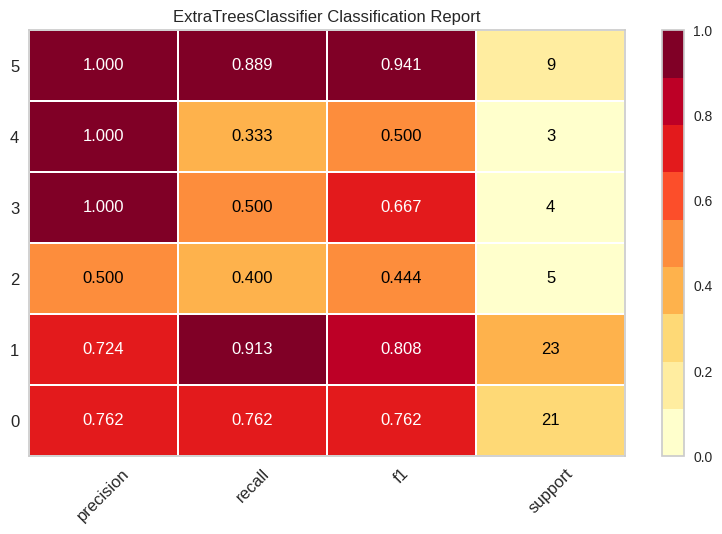

In [ ]:
# plot class report
plot_model(best, plot = 'class_report')

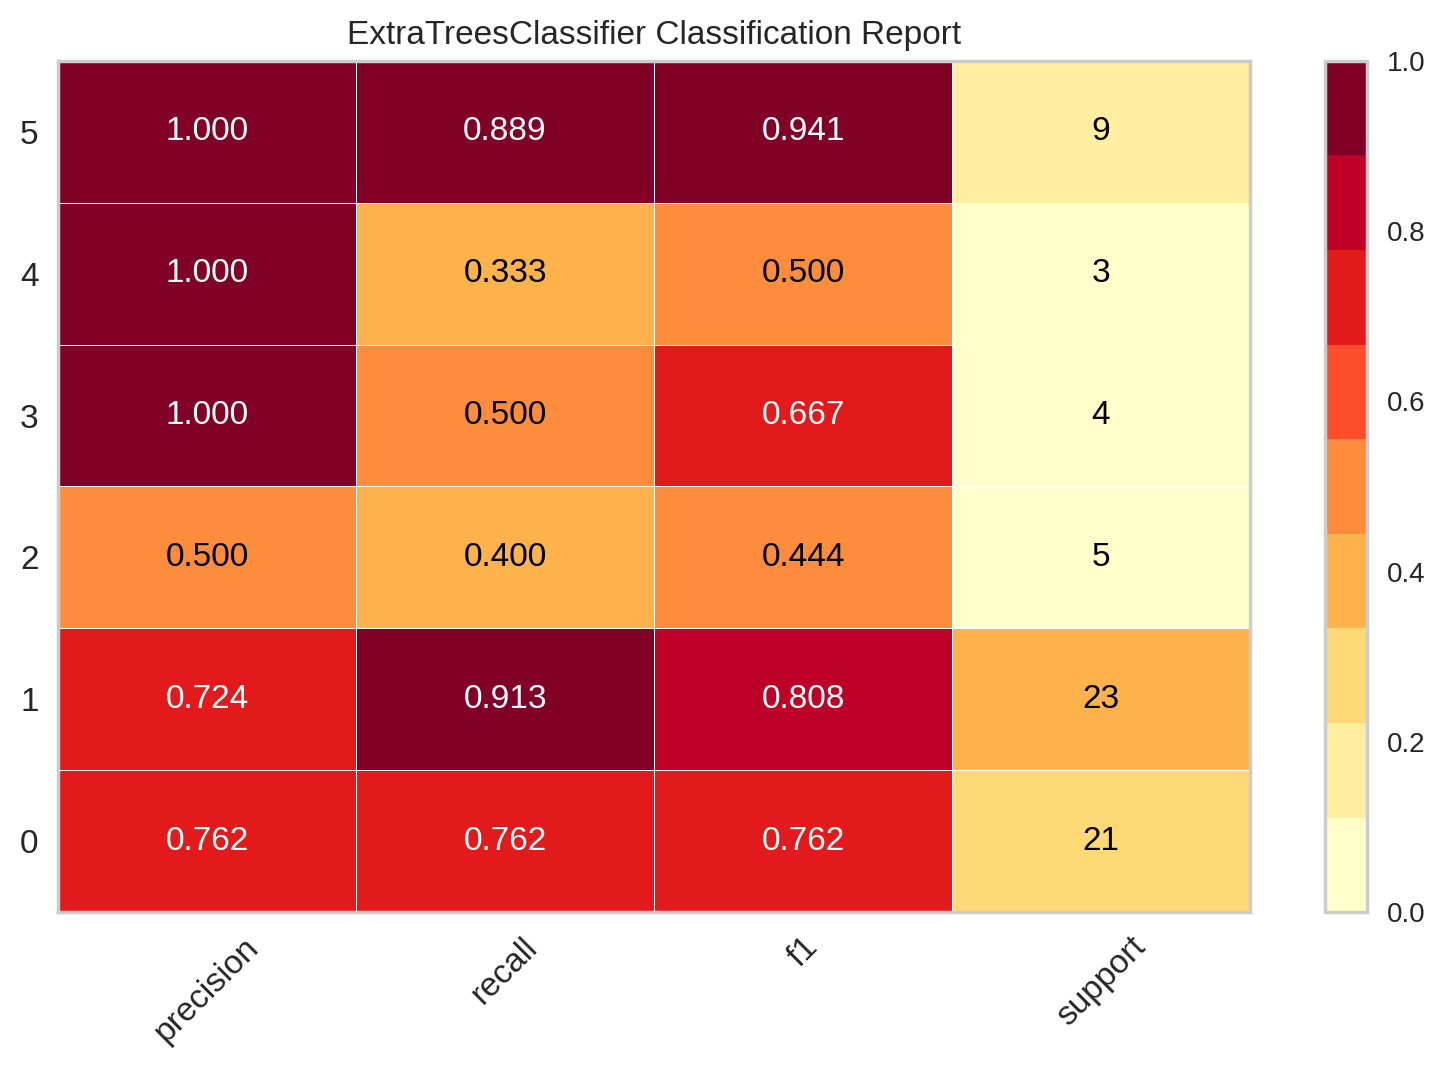

In [ ]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [ ]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [ ]:
# help(plot_model)

## ✅ Interpret Model

This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [ ]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.0000,0.6667,0.7105,0.6687,0.5223,0.5362
1,0.6000,0.0000,0.6000,0.4000,0.4800,0.3878,0.4283
2,0.8000,0.0000,0.8000,0.7270,0.7481,0.7078,0.7324
3,0.8667,0.9667,0.8667,0.8222,0.8400,0.8204,0.8254
4,0.8000,0.9676,0.8000,0.7556,0.7733,0.7305,0.7350
5,0.8667,0.9800,0.8667,0.9048,0.8611,0.8214,0.8417
6,0.7333,0.8933,0.7333,0.6583,0.6786,0.6250,0.6521
7,0.6667,0.9019,0.6667,0.6556,0.6385,0.5427,0.5683
8,0.6000,0.8771,0.6000,0.5222,0.5576,0.4375,0.4439


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

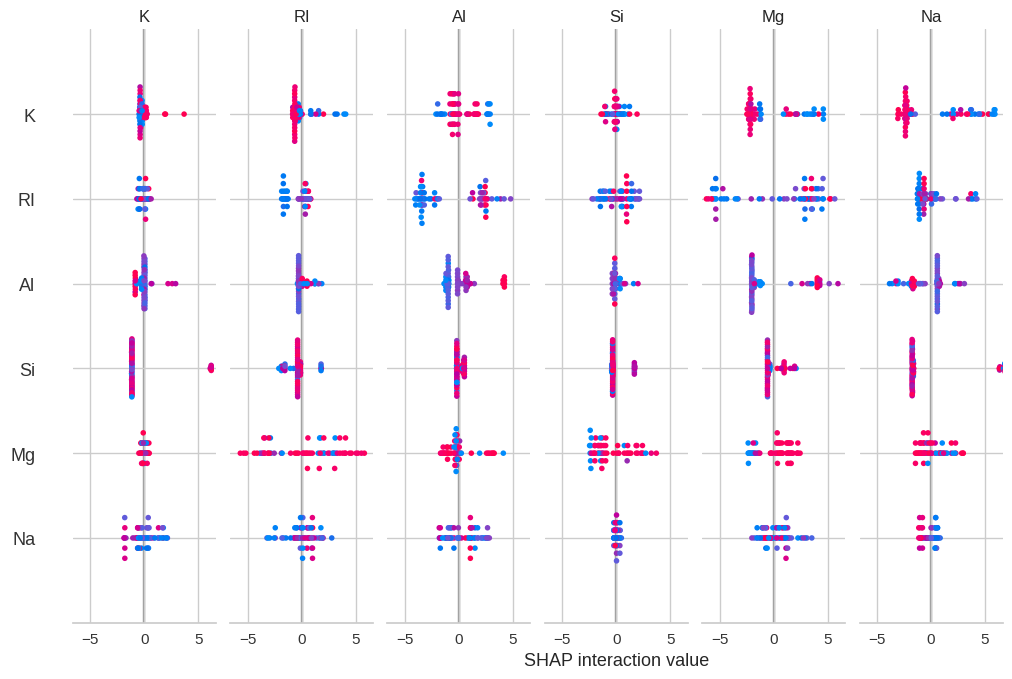

In [ ]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

In [ ]:
# help(interpret_model)

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [ ]:
automl()

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)